In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Processed Datasets/DrDoS_DNS.csv')
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [3]:
class_counts = df['Label'].value_counts()
print(class_counts)

Label
1    4908665
0       3354
Name: count, dtype: int64


In [4]:
df.shape

(4912019, 85)

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state=42)

In [6]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 27)
smote_X_train , smote_y_train = smote.fit_resample(X_train,y_train)

In [7]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
smote_X_train = scaler.fit_transform(smote_X_train)
X_test = scaler.transform(X_test)

In [8]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42,n_jobs=-1)
model.fit(smote_X_train, smote_y_train)
y_pred = model.predict(X_test)

In [9]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [10]:
from sklearn.metrics import classification_report,roc_curve, auc,RocCurveDisplay

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1098
           1       1.00      1.00      1.00   1619869

    accuracy                           1.00   1620967
   macro avg       1.00      1.00      1.00   1620967
weighted avg       1.00      1.00      1.00   1620967



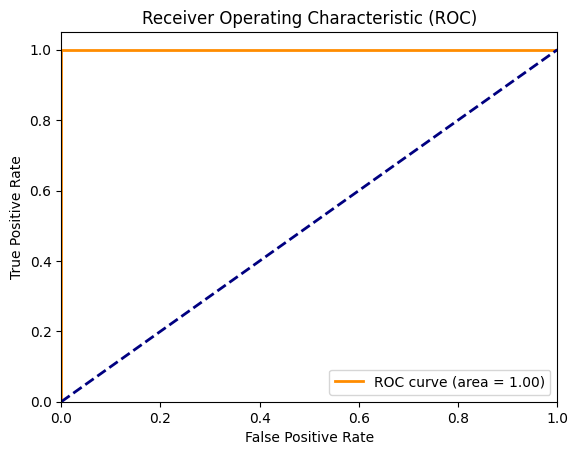

In [11]:
# Predict probabilities for the positive class (class 1)
y_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

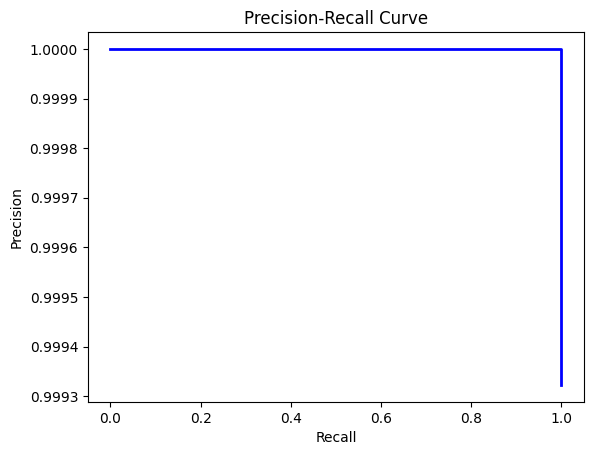

In [12]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Plot the Precision-Recall curve
plt.figure()
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [13]:
from collections import Counter

print(Counter(smote_y_train))

Counter({1: 3288796, 0: 3288796})
